In [72]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

In [23]:
data_X_train = pd.read_csv('samsung_train.txt', header=None, delim_whitespace=True)
data_X_test  = pd.read_csv('samsung_test.txt', header=None, delim_whitespace=True)
data_y_train = pd.read_csv('samsung_train_labels.txt', header=None, delim_whitespace=True)
data_y_test  = pd.read_csv('samsung_test_labels.txt', header=None, delim_whitespace=True)

X_full = pd.concat([data_X_train,data_X_test], ignore_index=True)
y_full = pd.concat([data_y_train,data_y_test], ignore_index=True)

In [24]:
print('Trainig - shape:',data_X_train.shape)
print('Test - shape: ',data_X_test.shape)
print('Full - shape: ',X_full.shape)

Trainig - shape: (7352, 561)
Test - shape:  (2947, 561)
Full - shape:  (10299, 561)


In [25]:
data_X_train.duplicated().sum()

0

In [26]:
data_X_train.isna().values.sum()

0

In [27]:
y_1=data_y_test.value_counts(normalize=True).round(4)
y_2=data_y_train.value_counts(normalize=True).round(4)
y_3=y_full.value_counts(normalize=True).round(4)
df=pd.concat({'Y test':y_1,'Y train':y_2,'Y full':y_3},axis=1)
df

,Y test,Y train,Y full
0,,,
6,0.1822,0.1914,0.1888
5,0.1805,0.1869,0.1851
1,0.1683,0.1668,0.1672
4,0.1666,0.1749,0.1725
2,0.1598,0.1459,0.1499
3,0.1425,0.1341,0.1365


Grupa osób, które przeprowdziły pomiary, została przydzielona w spozób losowy do grup Test i Train. Rozkład etykiet jest bardzo zbliżony w obydwu grupach. Ze względu na różne uwarunkowania fizyczne - różne pomiary, połączę dane.

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full)

In [29]:
#y_1=y_test.value_counts(normalize=True).round(4)
#y_2=y_train.value_counts(normalize=True).round(4)
#y_3=y_full.value_counts(normalize=True).round(4)
#df=pd.concat({'Y test':y_1,'Y train':y_2,'Y full':y_3},axis=1)
#df

In [30]:
scaler = StandardScaler()
X_full_standardized =scaler.fit_transform(X_full)
X_full_standardized=pd.DataFrame(X_full_standardized)

y_full=pd.DataFrame(y_full)

## PCA

In [31]:
pca = PCA(n_components=10, random_state=42)
X_full_standardized_pca = pca.fit_transform(X_full_standardized)
X_full_standardized_pca = pd.DataFrame(X_full_standardized_pca)

X_full_standardized_pca

,0,1,2,3,4,5,6,7,8,9
0,-16.380980,1.995083,3.415684,-0.649883,7.825048,-2.771791,2.296962,5.224663,-1.353182,-3.775101
1,-15.582173,1.182594,-0.321197,2.748084,4.729416,-1.589193,-0.334225,1.620514,-0.003099,0.061709
2,-15.423989,2.243166,-1.237784,4.002884,4.402714,-1.035048,-0.129618,1.279322,0.191383,-0.790106
3,-15.647807,3.762882,-1.275295,2.806655,3.239167,-0.743300,0.326391,1.742207,0.902024,-1.594601
4,-15.842320,4.438897,-1.808223,3.160511,3.331078,-0.911901,-0.862170,0.091299,0.527892,1.019584
...,...,...,...,...,...,...,...,...,...,...
10294,10.166057,-6.504223,-1.055475,3.284360,-3.092389,1.825857,1.115231,-3.700877,-0.454144,0.253644
10295,12.131154,-4.882447,-0.652955,2.843113,-1.855639,-0.237487,0.942538,-1.648500,-1.268083,1.505828
10296,11.846853,-3.433565,2.187996,2.376425,-0.097053,0.340687,1.476456,-0.113471,-1.170458,-0.471232
10297,8.206686,-4.386489,1.318702,3.571477,-0.861670,0.819968,2.610262,-1.138128,-1.499567,-0.514962


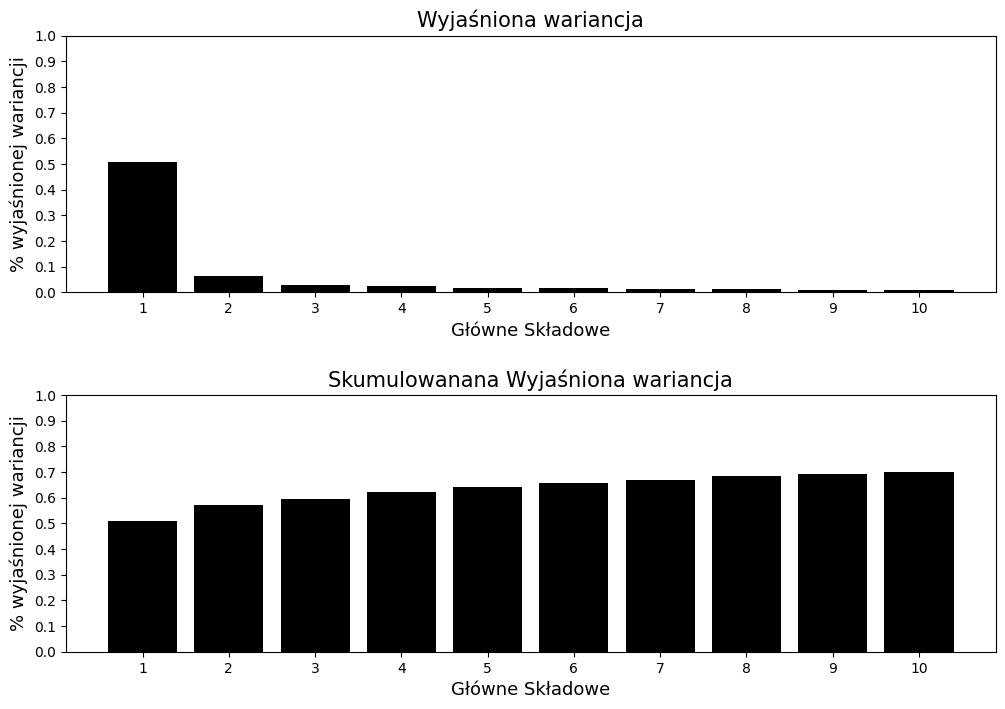

Główna składowa:  1 Wyjaśniona wariancja:  0.50738 Skumulowana Wyjaśniona wariancja:  0.50738
Główna składowa:  2 Wyjaśniona wariancja:  0.06239 Skumulowana Wyjaśniona wariancja:  0.56977
Główna składowa:  3 Wyjaśniona wariancja:  0.02693 Skumulowana Wyjaśniona wariancja:  0.5967
Główna składowa:  4 Wyjaśniona wariancja:  0.02453 Skumulowana Wyjaśniona wariancja:  0.62123
Główna składowa:  5 Wyjaśniona wariancja:  0.01889 Skumulowana Wyjaśniona wariancja:  0.64012
Główna składowa:  6 Wyjaśniona wariancja:  0.01631 Skumulowana Wyjaśniona wariancja:  0.65643
Główna składowa:  7 Wyjaśniona wariancja:  0.01415 Skumulowana Wyjaśniona wariancja:  0.67058
Główna składowa:  8 Wyjaśniona wariancja:  0.01216 Skumulowana Wyjaśniona wariancja:  0.68274
Główna składowa:  9 Wyjaśniona wariancja:  0.00985 Skumulowana Wyjaśniona wariancja:  0.69259
Główna składowa:  10 Wyjaśniona wariancja:  0.00949 Skumulowana Wyjaśniona wariancja:  0.70208


In [32]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_),
       np.cumsum(pca.explained_variance_ratio_), 
       color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print("Główna składowa: ",principal_component,
          "Wyjaśniona wariancja: ",np.round(explained_var, 5),
          "Skumulowana Wyjaśniona wariancja: ", np.round(cum_explained_var, 5))
    principal_component += 1

In [33]:
X_full_standardized_PCA = X_full_standardized_pca[[0,1]]

## KMeans

In [34]:
# tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X_full_standardized)
    for k in range(2, 20)
]

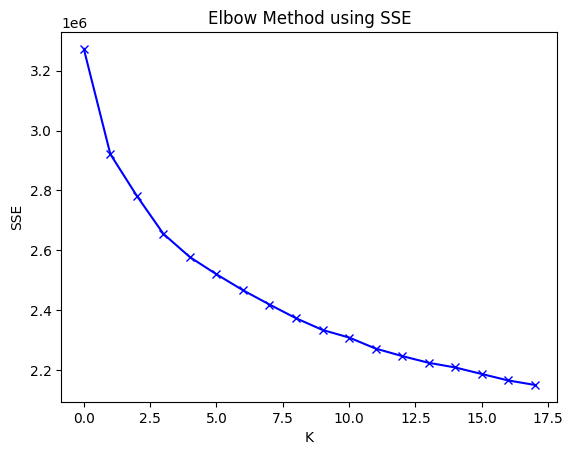

In [35]:
# Elbow Method using SSE 
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(0, 18), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

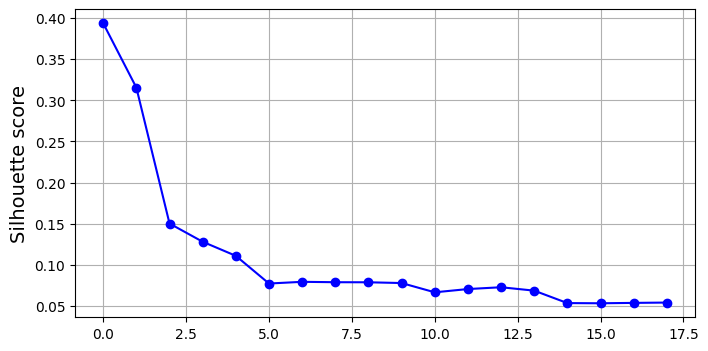

In [36]:
silhouette_scores = [
    silhouette_score(X_full_standardized, model.labels_)
    for model in kmeans_per_k
]
plt.figure(figsize=(8, 4))
plt.plot(range(0, 18),silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In [37]:
km = KMeans(init="random", n_clusters=5)
y_pred=km.fit_predict(X_full_standardized_PCA)

In [38]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

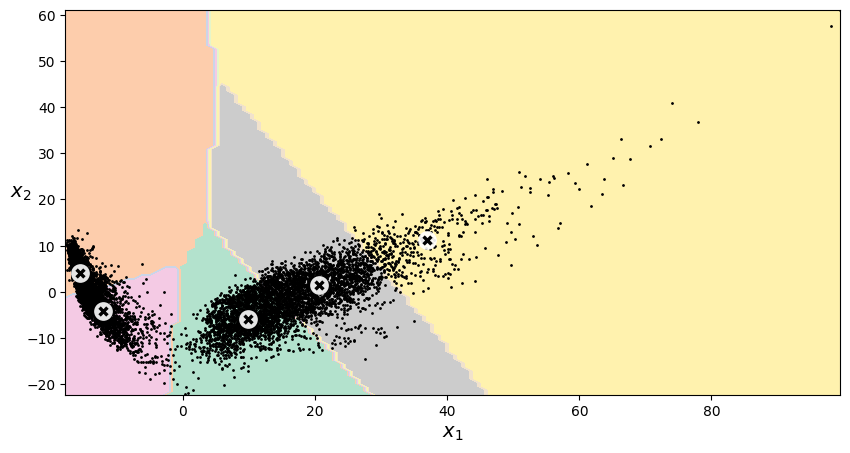

In [39]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(km, X_full_standardized_PCA.values)
plt.show()

## DBSCAN

In [64]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan.fit(X_full_standardized)

dbscan_pca = DBSCAN(eps=1.2, min_samples=5)
dbscan_pca.fit(X_full_standardized_PCA)

DBSCAN(eps=1.2)

In [58]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

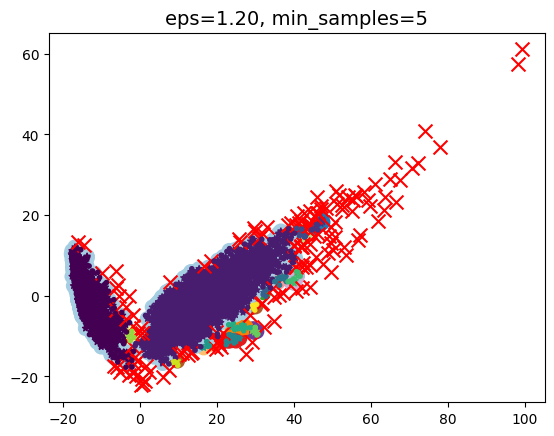

In [65]:
plot_dbscan(dbscan_pca, X_full_standardized_PCA.values, size=100)


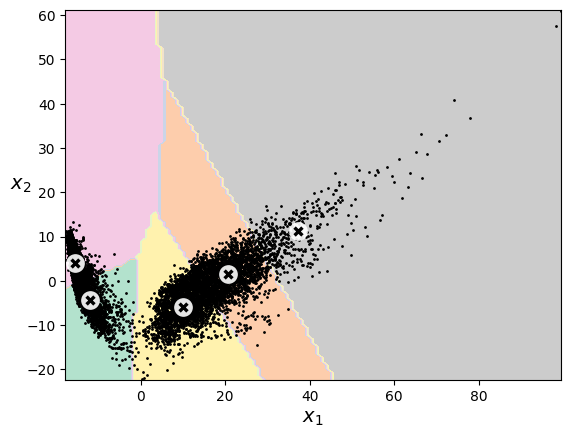

In [67]:
KMeans_clf = KMeans(n_clusters=5, max_iter=100000)
KMeans_clf.fit(X_full_standardized_PCA)

plot_decision_boundaries(KMeans_clf, X_full_standardized_PCA.values)

## Gaussian Mixture Models 

In [86]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(X_full_standardized_PCA)

GaussianMixture(n_components=6, n_init=10, random_state=42)

In [84]:
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

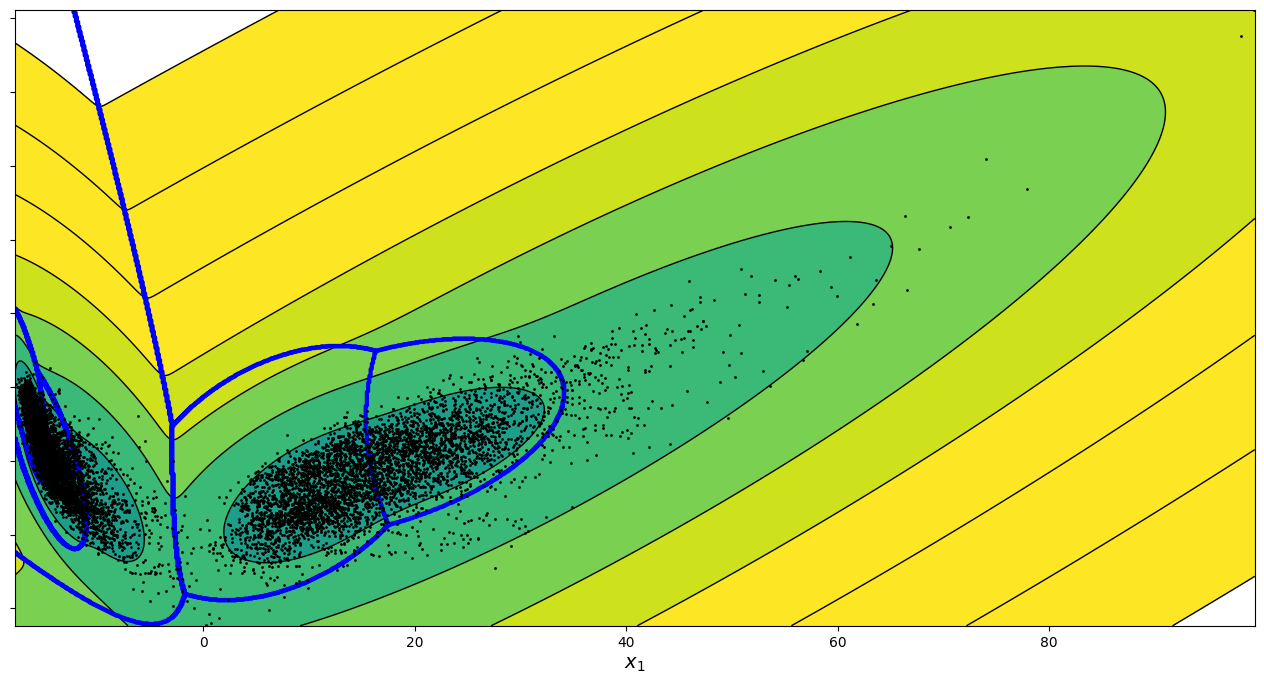

In [87]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X_full_standardized_PCA.values)
plt.show()